In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

T    TM    Tm   H   VV    V   VM      PM 2.5
0  23.4  30.3  19.0  59  6.3  4.3  5.4  284.795833
1  22.4  30.3  16.9  57  6.9  3.3  7.6  219.720833
2  24.0  31.8  16.9  51  6.9  2.8  5.4  182.187500
3  22.8  30.2  17.6  55  7.7  3.7  7.6  154.037500
4  23.1  30.6  17.4  46  6.9  3.3  5.4  223.208333

In [3]:
def transform_dropna(dataframe):
    #Transforming my columns to float datatype
    cols = list(dataframe.columns)
    for col in cols:
        dataframe[col] = pd.to_numeric(dataframe[col], downcast='float',errors='coerce')
    dataframe = dataframe.dropna()
    return dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1128 non-null   object 
 1   TM      1128 non-null   object 
 2   Tm      1128 non-null   object 
 3   H       1128 non-null   object 
 4   VV      1128 non-null   object 
 5   V       1128 non-null   object 
 6   VM      1128 non-null   object 
 7   PM 2.5  1122 non-null   float64
dtypes: float64(1), object(7)
memory usage: 70.6+ KB


In [5]:
df = transform_dropna(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1103 non-null   float32
 1   TM      1103 non-null   float32
 2   Tm      1103 non-null   float32
 3   H       1103 non-null   float32
 4   VV      1103 non-null   float32
 5   V       1103 non-null   float32
 6   VM      1103 non-null   float32
 7   PM 2.5  1103 non-null   float32
dtypes: float32(8)
memory usage: 43.1 KB


In [7]:
df.describe()

T           TM           Tm            H           VV  \
count  1103.000000  1103.000000  1103.000000  1103.000000  1103.000000   
mean     24.118134    30.408884    19.738712    65.218498     6.669356   
std       2.203441     2.820889     2.186266    15.038859     0.661190   
min      18.900000    21.600000    12.900000    21.000000     3.700000   
25%      22.600000    28.400000    18.600000    56.000000     6.300000   
50%      23.799999    29.900000    20.100000    68.000000     6.900000   
75%      25.299999    32.000000    21.000000    77.000000     6.900000   
max      31.200001    39.200001    25.799999    97.000000     9.200000   

                 V           VM       PM 2.5  
count  1103.000000  1103.000000  1103.000000  
mean      4.233908     7.617317   108.672920  
std       2.532782     4.304931    82.544212  
min       0.200000     1.900000     0.000000  
25%       2.400000     5.400000    43.958332  
50%       3.700000     7.600000    83.458336  
75%       5.600000     9.400000   152.818748  
max      14.800000    51.900002   404.500000

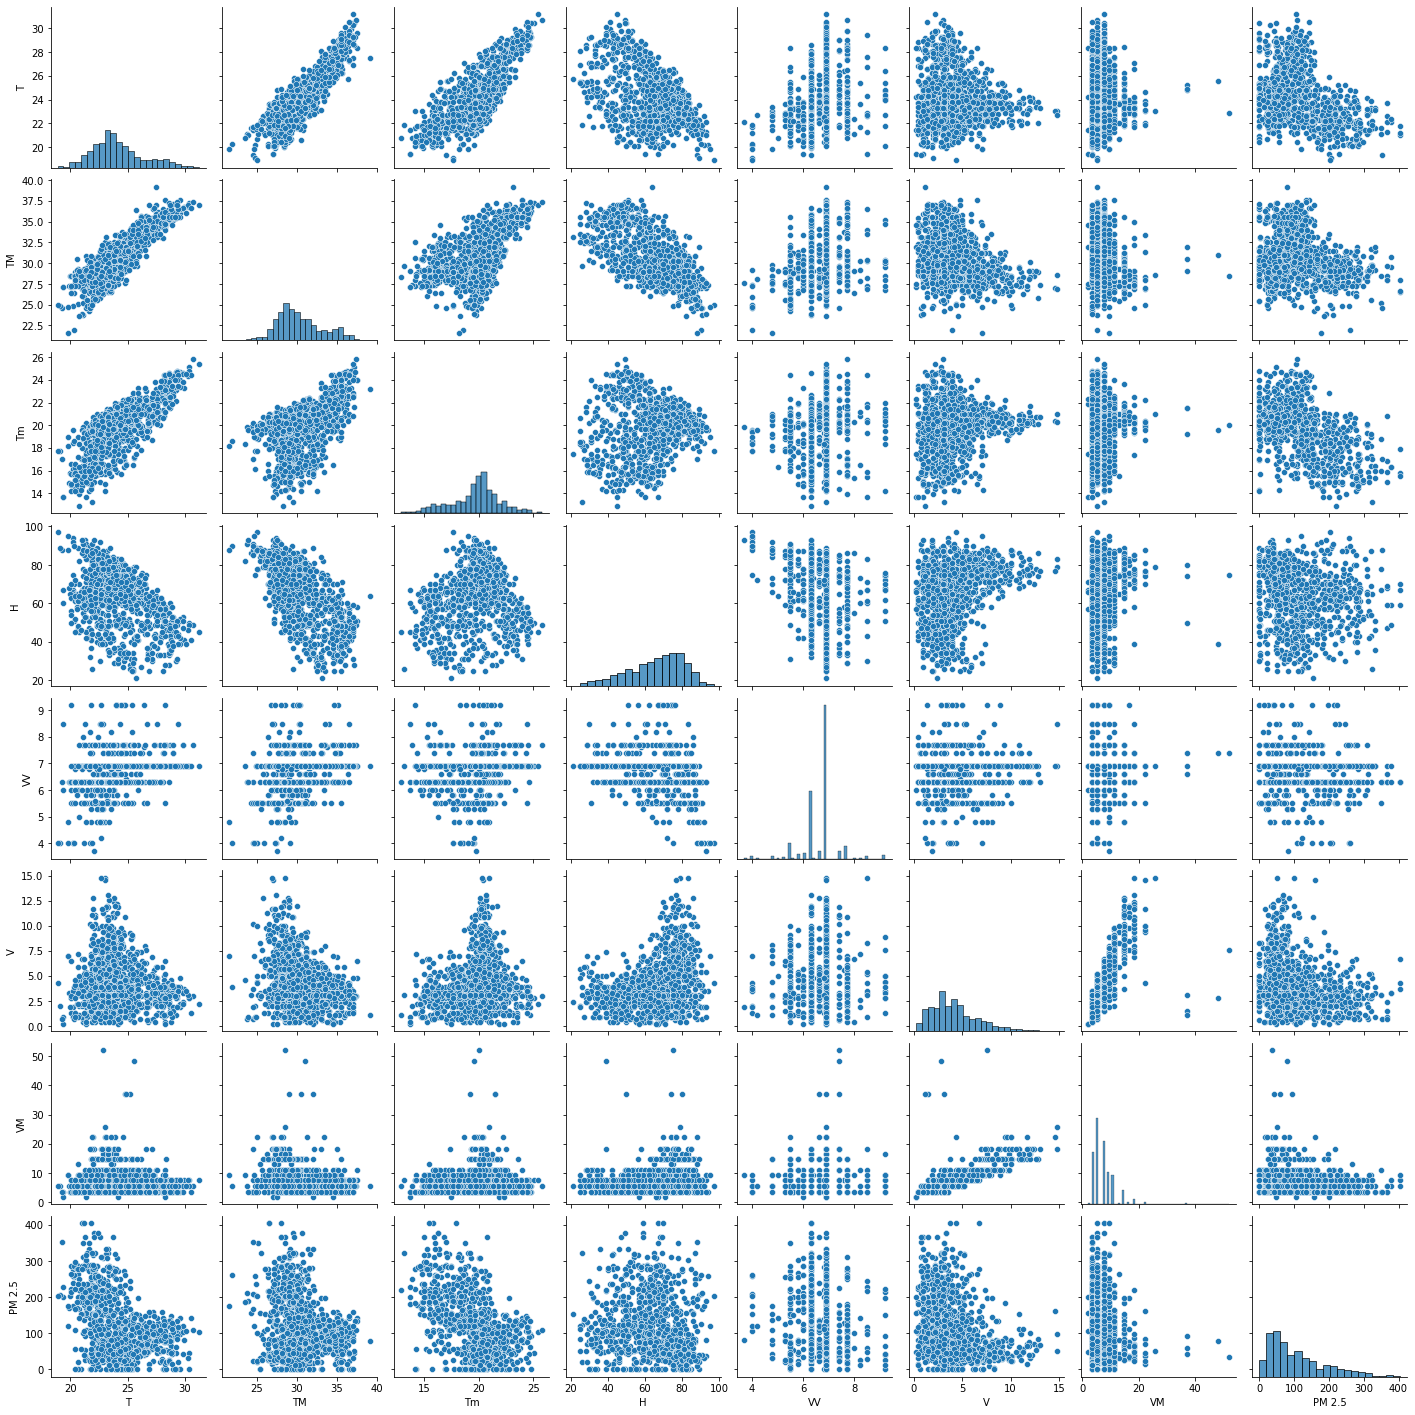

In [8]:
sns.pairplot(df)

In [9]:
### Splitting the independent and dependent variable
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [10]:
X.shape,y.shape

((1103, 7), (1103,))

In [11]:
X.head()

T         TM    Tm     H   VV    V   VM
0  23.400000  30.299999  19.0  59.0  6.3  4.3  5.4
1  22.400000  30.299999  16.9  57.0  6.9  3.3  7.6
2  24.000000  31.799999  16.9  51.0  6.9  2.8  5.4
3  22.799999  30.200001  17.6  55.0  7.7  3.7  7.6
4  23.100000  30.600000  17.4  46.0  6.9  3.3  5.4

In [12]:
y[:5]

0    284.795837
1    219.720840
2    182.187500
3    154.037506
4    223.208328
Name: PM 2.5, dtype: float32

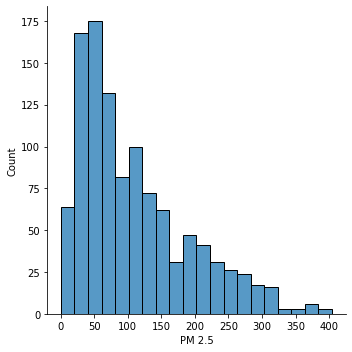

In [13]:
sns.displot(y)

## Decision Tree Regressor

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [16]:
dtree = DecisionTreeRegressor(criterion="mse")

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
print("Coefficient of determination R2 <-- on train set: {}".format(dtree.score(X_train,y_train)))

Coefficient of determination R2 <-- on train set: 1.0


In [19]:
print("Coefficient of determination R2 <-- on test set: {}".format(dtree.score(X_test,y_test)))

Coefficient of determination R2 <-- on test set: -0.11937914885053602


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
score = cross_val_score(dtree,X,y,cv=5)

In [22]:
score.mean()

-0.23058828361425485

In [30]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [31]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM']

In [33]:
# Create DOT data
dot_data = export_graphviz(dtree, out_file=None, 
                                feature_names=features,  
                                class_names=y.index)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.85462 to fit



In [36]:
import graphviz

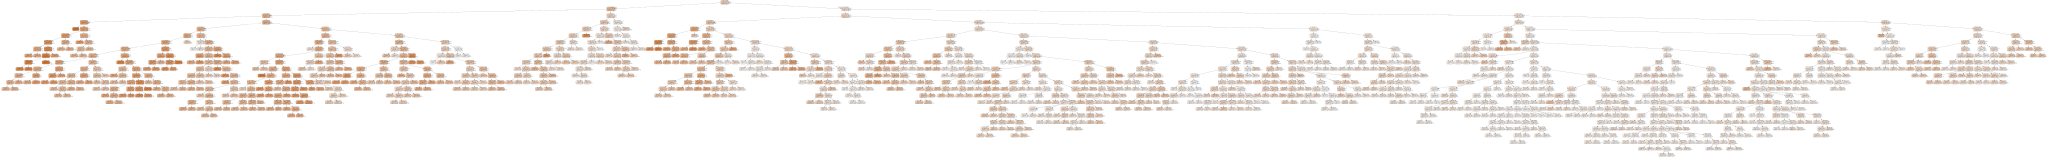

In [41]:
data = export_graphviz(dtree,out_file=None,feature_names=features,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

In [43]:
prediction = dtree.predict(X_test)

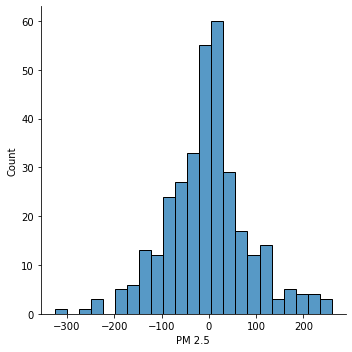

In [44]:
sns.displot(y_test-prediction)

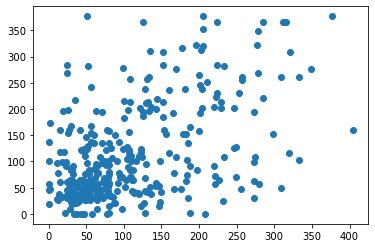

In [45]:
plt.scatter(y_test,prediction)

In [47]:
params = {
    "splitter" : ['best','random'],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_samples_leaf": [1,2,3,4,5],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,60]
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [49]:
search = GridSearchCV(dtree,param_grid=params,scoring="neg_mean_squared_error",n_jobs=-1,cv=10,verbose=3)

In [50]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(temp_sec,60)
        print(f'Time taken: {thour} hours,{tmin} mins and {tsec} seconds')

In [51]:
from datetime import datetime
start_time = timer(None)
search.fit(X,y)
timer(start_time)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits
Time taken: 0.0 hours,5.0 mins and 37.46954199999999 seconds


In [52]:
search.best_params_

{'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [53]:
search.best_score_

-4331.279153855398

In [54]:
predict = search.predict(X_test)

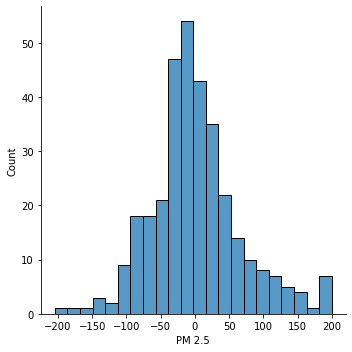

In [55]:
sns.displot(y_test-predict)

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('MAE:', mean_absolute_error(y_test,predict))
print('MSE:', mean_squared_error(y_test,predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test,predict)))

MAE: 48.71572303418703
MSE: 4311.603653636062
RMSE: 65.66280266357857


In [57]:
import pickle
pickle.dump(search,open('decision_regressor_model.pkl','wb'))